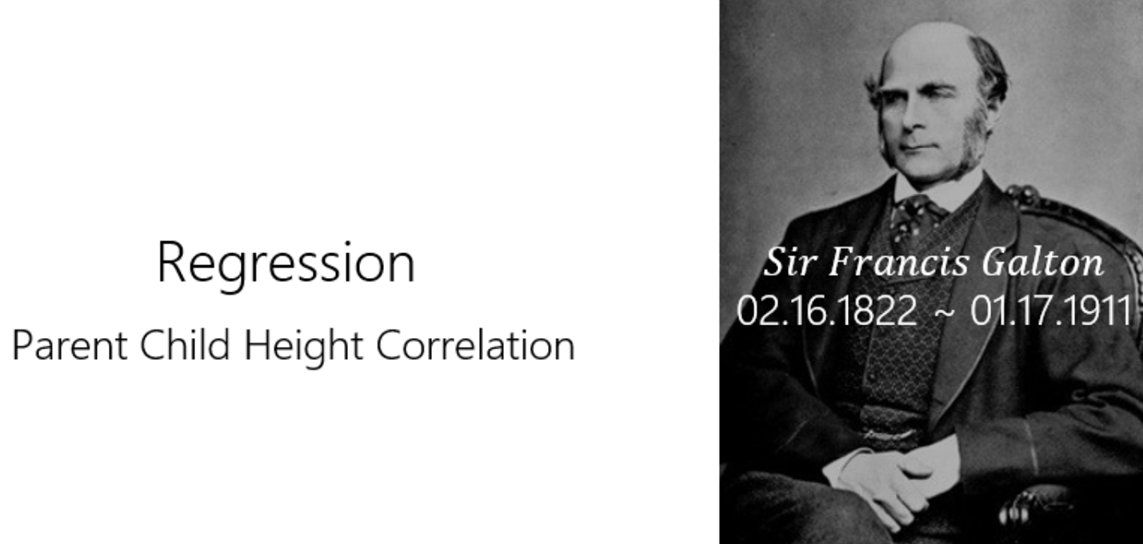

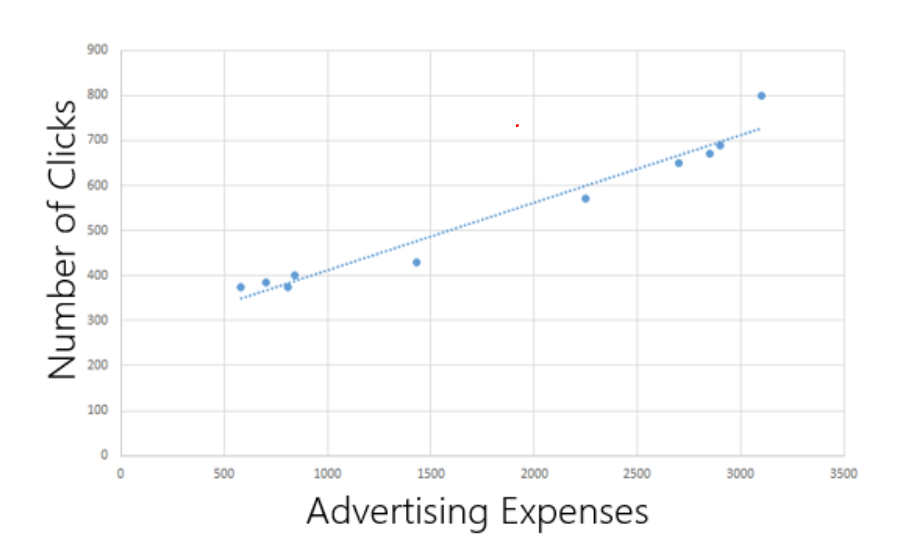

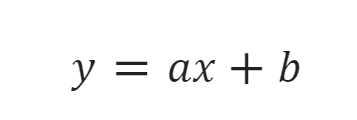

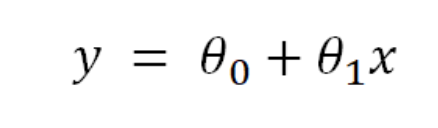

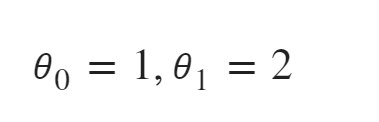

In [1]:
class Y_pred():
    def __init__(self, theta_0, theta_1):
        self.theta_0 = theta_0
        self.theta_1 = theta_1

In [2]:
def out_y_hat(self, input_x):

    y_hat_row = []

    for i in range(len(input_x)):
        y_hat = self.theta_0 + self.theta_1 * input_x[i]
        y_hat_row.append(y_hat)
    
    return y_hat_row

Y_pred.y_hat = out_y_hat

In [3]:
Y_pred_C = Y_pred(theta_0 = 1, theta_1 = 2)

x = [2000]
Y_pred_C.y_hat(input_x = x)

[4001]

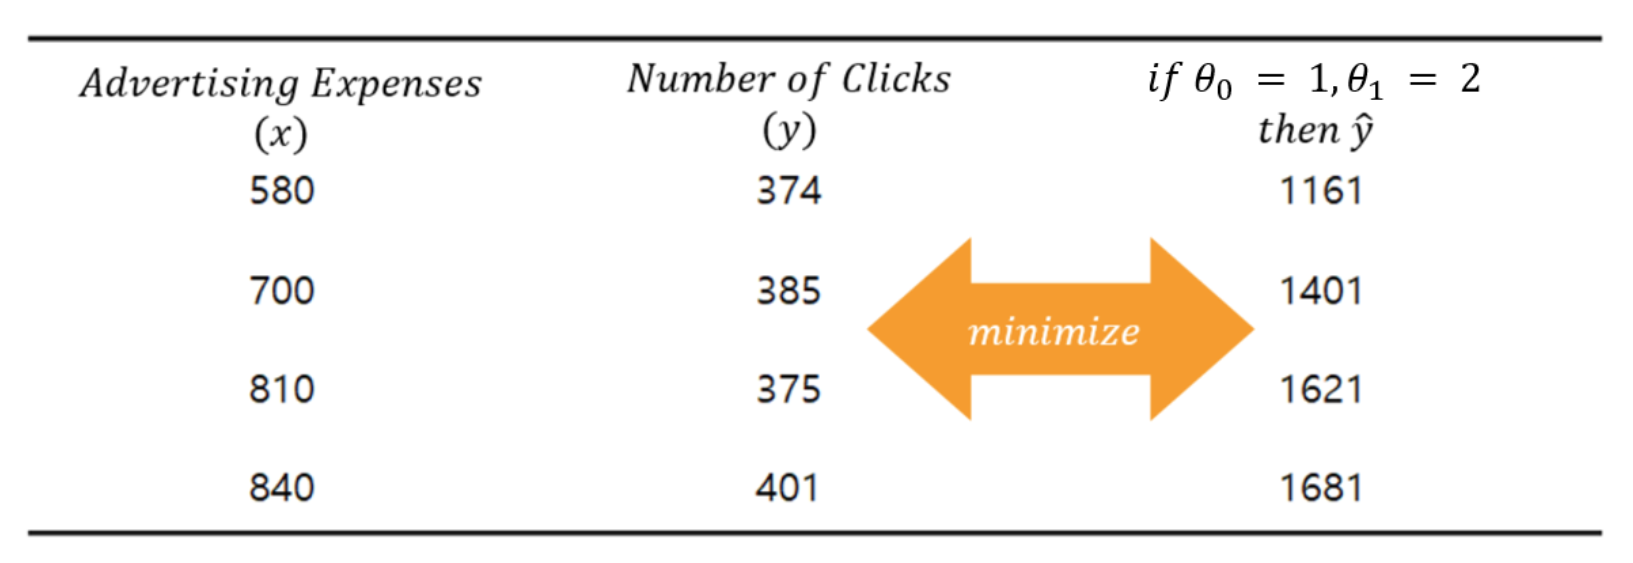

In [4]:
Y_pred_C = Y_pred(theta_0 = 1, theta_1 = 2)

x = [580, 700, 810, 840]
Y_pred_C.y_hat(input_x = x)

[1161, 1401, 1621, 1681]

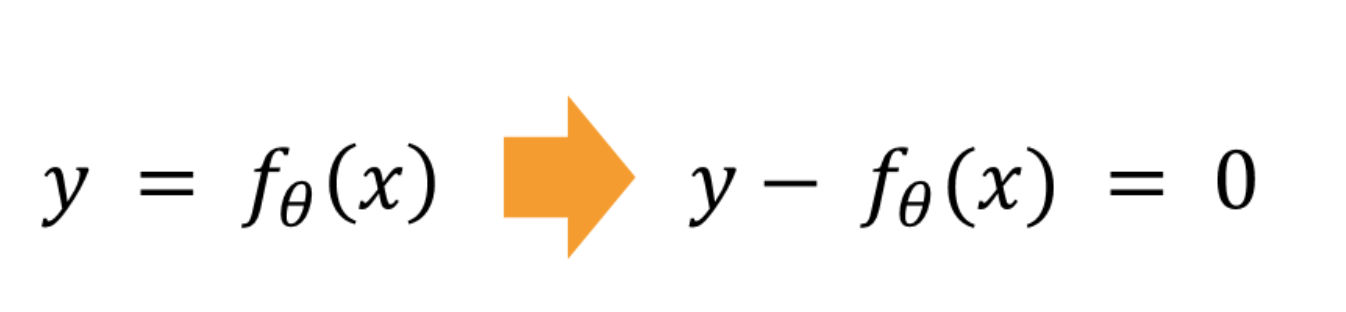

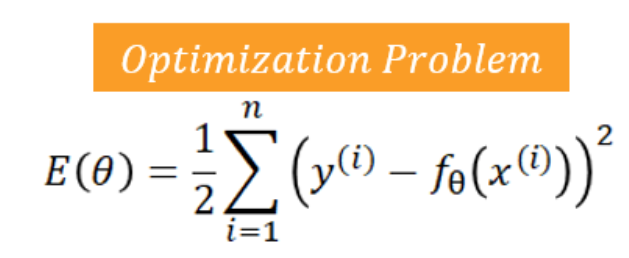

In [5]:
import numpy as np
y_label_total = [374, 385, 375, 401]
y_hat_total   = [1161, 1401, 1621, 1681]

diff_row = []
for i in range(len(y_label_total)):
    diff = y_label_total[i] - y_hat_total[i]
    diff_row.append(diff)
    square = np.square(diff_row)
    sse = 1/2 * (np.sum(square))

print("Diff : {} \nSquare : {}\nSSE : {}".format(diff_row, square, sse))

Diff : [-787, -1016, -1246, -1280] 
Square : [ 619369 1032256 1552516 1638400]
SSE : 2421270.5


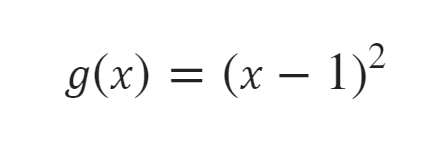

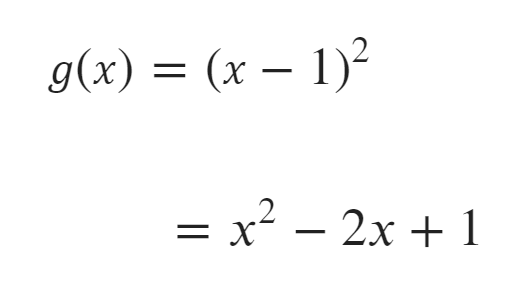

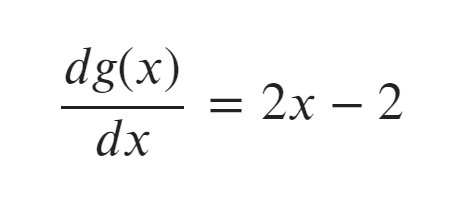

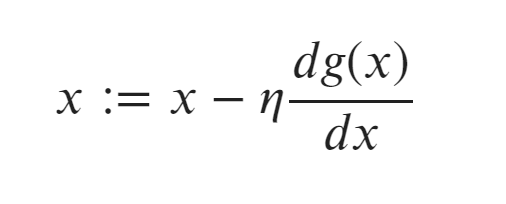

# eta / 학습률 / Learning Rate(lr) / 양의 값 / 0.001
# 값의 갱신 보폭(폭)을 제어한다.

# EX) X = 3  /  lr = 1 / 값의 갱신 횟수 4

In [6]:
def g(x, learning_rate):
    print("Now X value : {}".format(x))
    epoch_1_x = x - learning_rate * ((2*x) - 2)
    print("Epoch - 1 / x : {} ".format(epoch_1_x))

    epoch_2_x = epoch_1_x - learning_rate * ((2*epoch_1_x) - 2)
    print("Epoch - 2 / x : {} ".format(epoch_2_x))

    epoch_3_x = epoch_2_x - learning_rate * ((2*epoch_2_x) - 2)
    print("Epoch - 3 / x : {} ".format(epoch_3_x))

    epoch_4_x = epoch_3_x - learning_rate * ((2*epoch_3_x) - 2)
    print("Epoch - 4 / x : {} ".format(epoch_4_x))

In [7]:
g(x = 3, learning_rate = 0.1)

Now X value : 3
Epoch - 1 / x : 2.6 
Epoch - 2 / x : 2.2800000000000002 
Epoch - 3 / x : 2.024 
Epoch - 4 / x : 1.8192 


In [8]:
import matplotlib.pyplot as plt

def g(learning_rate, epoch_count, random_value_bool = False ,x = 3):
    if random_value_bool:
        x = np.random.normal(0,1, size = 1)

    print("Now X Value : {}".format(x))
    print("Now Learning_Rate : {}".format(learning_rate))
    row_x = []
    for i in range(epoch_count):
        x = x - learning_rate * ((2*x)-2)
        print("Epoch : {} / x : {}".format(i+1, np.round(x,3)))
        row_x.append(x)

    return row_x



In [9]:
result = g(learning_rate = 3, epoch_count = 20, x = 3)

Now X Value : 3
Now Learning_Rate : 3
Epoch : 1 / x : -9
Epoch : 2 / x : 51
Epoch : 3 / x : -249
Epoch : 4 / x : 1251
Epoch : 5 / x : -6249
Epoch : 6 / x : 31251
Epoch : 7 / x : -156249
Epoch : 8 / x : 781251
Epoch : 9 / x : -3906249
Epoch : 10 / x : 19531251
Epoch : 11 / x : -97656249
Epoch : 12 / x : 488281251
Epoch : 13 / x : -2441406249
Epoch : 14 / x : 12207031251
Epoch : 15 / x : -61035156249
Epoch : 16 / x : 305175781251
Epoch : 17 / x : -1525878906249
Epoch : 18 / x : 7629394531251
Epoch : 19 / x : -38146972656249
Epoch : 20 / x : 190734863281251


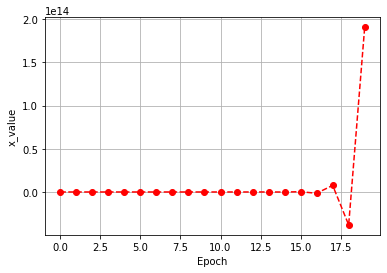

In [10]:
plt.plot(result, '--o', color = "red")
plt.xlabel("Epoch")
plt.ylabel("x_value")
plt.grid()
plt.show()

In [11]:
result = g(learning_rate = 0.01, 
           epoch_count = 20, 
           random_value_bool= True)

Now X Value : [0.96448544]
Now Learning_Rate : 0.01
Epoch : 1 / x : [0.965]
Epoch : 2 / x : [0.966]
Epoch : 3 / x : [0.967]
Epoch : 4 / x : [0.967]
Epoch : 5 / x : [0.968]
Epoch : 6 / x : [0.969]
Epoch : 7 / x : [0.969]
Epoch : 8 / x : [0.97]
Epoch : 9 / x : [0.97]
Epoch : 10 / x : [0.971]
Epoch : 11 / x : [0.972]
Epoch : 12 / x : [0.972]
Epoch : 13 / x : [0.973]
Epoch : 14 / x : [0.973]
Epoch : 15 / x : [0.974]
Epoch : 16 / x : [0.974]
Epoch : 17 / x : [0.975]
Epoch : 18 / x : [0.975]
Epoch : 19 / x : [0.976]
Epoch : 20 / x : [0.976]


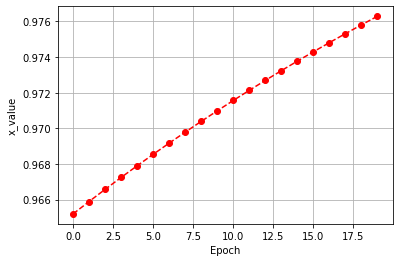

In [12]:
plt.plot(result, '--o', color = "red")
plt.xlabel("Epoch")
plt.ylabel("x_value")
plt.grid()
plt.show()

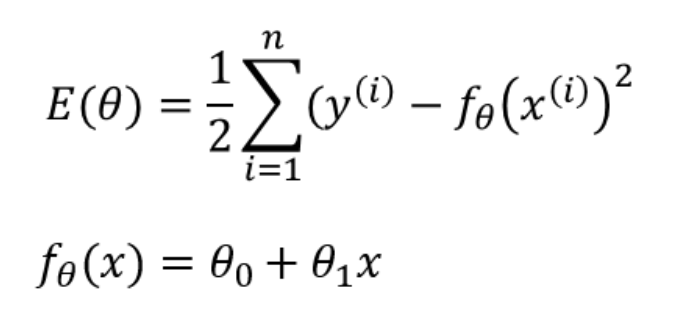

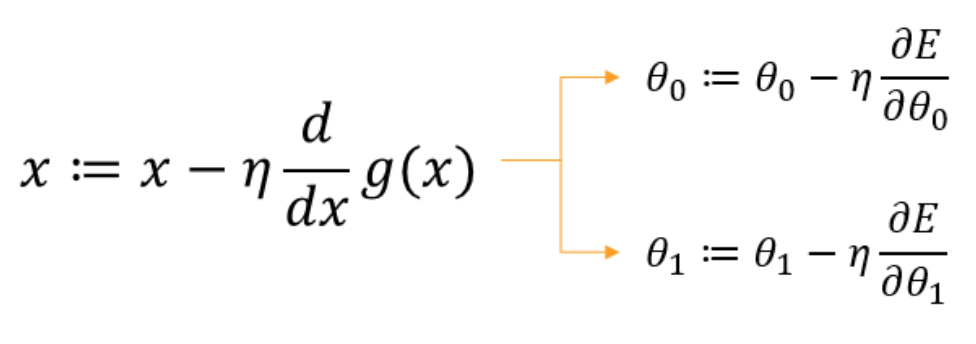

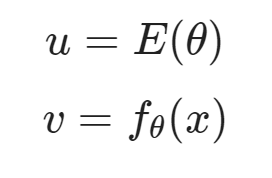

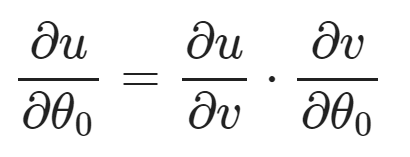

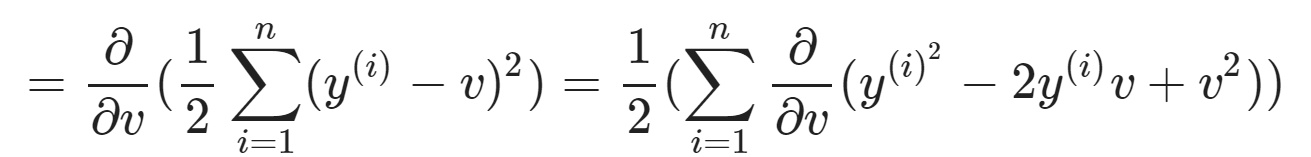

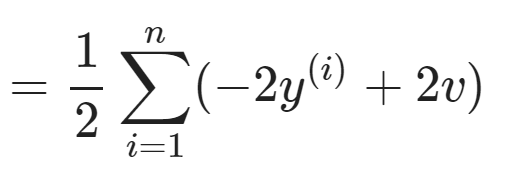

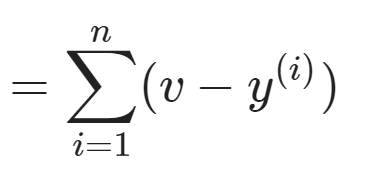

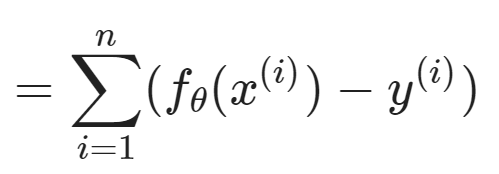

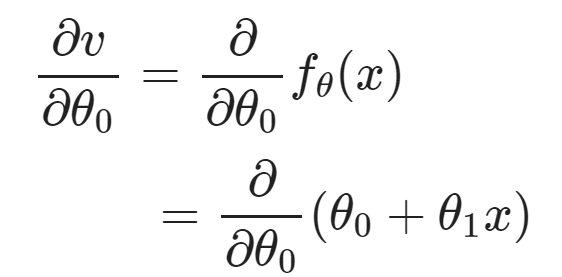

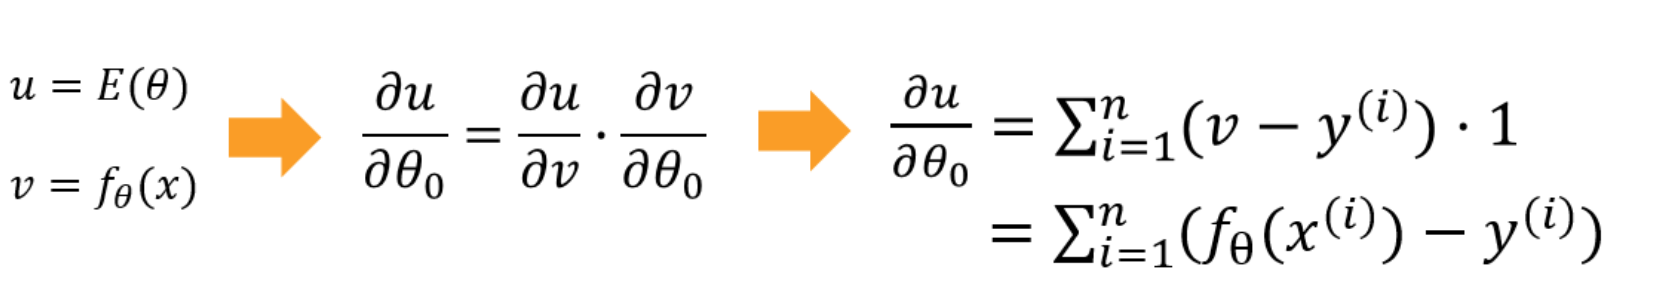

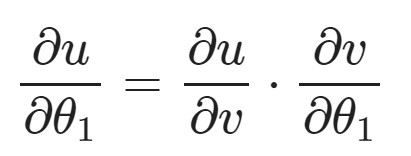

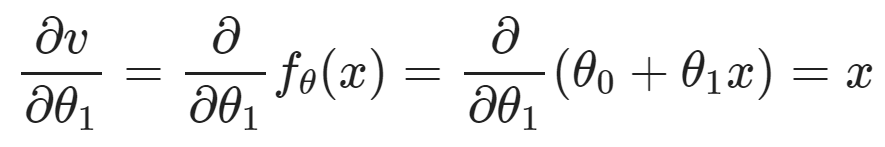

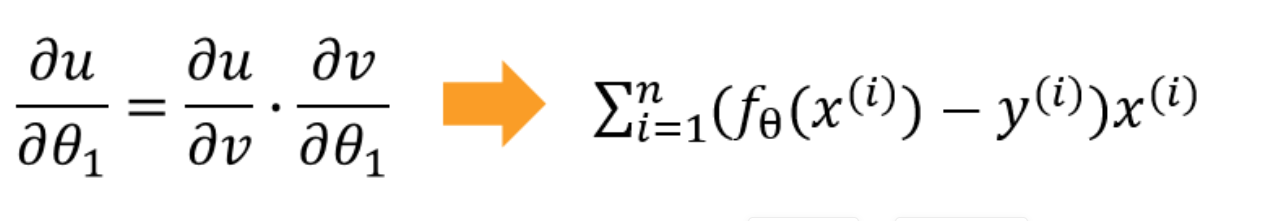

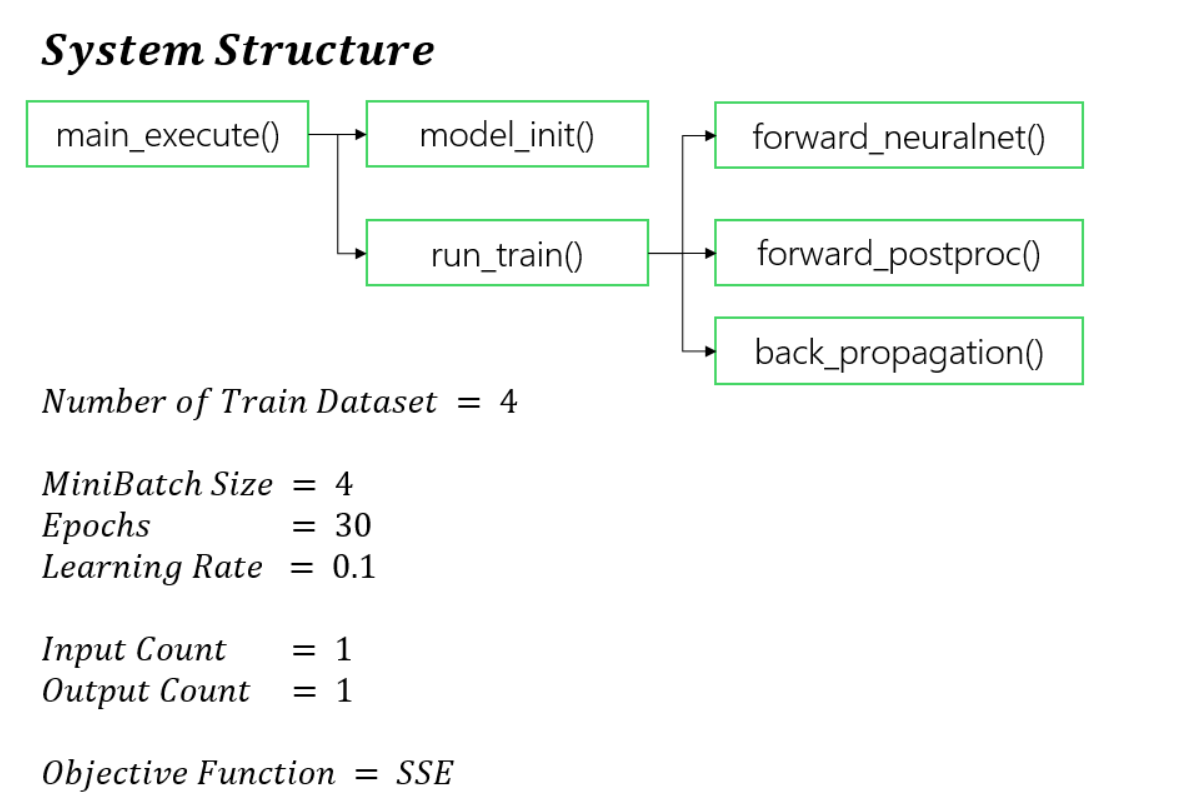

In [83]:
import numpy as np

x             = np.asarray([580, 700, 810, 840])
y_label_total = np.asarray([374, 385, 375, 401])

RND_MEAN = 0
RND_STD  = np.sqrt(1/len(x))

input_cnt  = 1
output_cnt = 1

def main_execute(x, y, epoch_count, report, lr = 0.001):
    model_init()
    sse_row, theta_0, theta_1 = run_train(x, y, epoch_count, report, lr)

    return sse_row, theta_0, theta_1

def model_init():
    global theta_0, theta_1

    theta_0 = np.random.normal(RND_MEAN, RND_STD, size = [output_cnt]) 
    theta_1 = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])


def run_train(x, y, epoch_count, report, lr):
    print("Initial theta_0 : {}".format(theta_0))
    print("Initial theta_1 : {}".format(theta_1))
    sse_row = []
    theta_0_row = []
    theta_1_row = []
    for epoch in range(epoch_count):
        y_hat = forward_neuralnet(x)
        sse = forward_postproc(y_hat, y_label_total)
        sse_row.append(sse)

        back_propagation(lr, y_hat)   

        theta_0_row.append(theta_0)
        theta_1_row.append(theta_1)

        if report > 0 and epoch % report == 0:
            print("Epoch - {}".format(epoch+1))
            print("SSE : {}".format(sse))

    print("============================")
    print("Final SSE : {}".format(sse))
    
    return sse_row, theta_0_row, theta_1_row



def forward_neuralnet(input_x):
    y_hat = theta_0 + theta_1 * input_x

    return y_hat 

def forward_postproc(output, y):
    diff   = output - y
    square = np.square(diff)
    sse    = 1/2 * (np.sum(square))

    return sse

def back_propagation(lr, y_hat):
    global theta_0, theta_1
    theta_0 = theta_0 - lr * (np.sum(y_hat - y_label_total))
    theta_1 = theta_1 - lr * (np.sum(y_hat - y_label_total) * x)


sse_row, theta_0, theta_1 = main_execute(x, 
                                         y_label_total, 
                                         epoch_count = 1000, 
                                         report = 1000, 
                                         lr = 0.000000001)

Initial theta_0 : [0.10836289]
Initial theta_1 : [[0.47623151]]
Epoch - 1
SSE : 6157.374346343145
Final SSE : 5287.869289127641


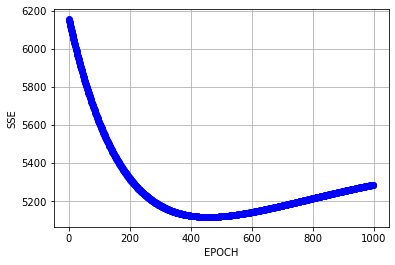

In [84]:
import matplotlib.pyplot as plt

plt.plot(sse_row, '--o', color = 'blue')
plt.xlabel('EPOCH')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [66]:
epoch_count = 10
report = 4
for epoch in range(epoch_count):
    print(epoch % report == 0)

True
False
False
False
True
False
False
False
True
False
